In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pmdarima import auto_arima

In [4]:
# Load the data
data = pd.read_csv('../data/TSLA_stock_data.csv', parse_dates=['Date'], index_col='Date')
data = data['Close']  # Focus on closing prices
data = data.asfreq('B')  # Use business days only
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_10468\886707494.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [ ]:
# Fit the SARIMA model using auto_arima
model = auto_arima(data, 
                   seasonal=True, 
                   m=12,  # Seasonal period (e.g., 12 for monthly data)
                   trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True)

# Fit the best model
sarima_result = model.fit(data)

In [5]:
# Define the number of future days to forecast (e.g., 252 business days for 12 months)
future_steps = 252

# Forecast future stock prices
future_forecast = sarima_result.predict(n_periods=future_steps)

# Create a date range for future predictions
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='B')

NameError: name 'sarima_result' is not defined

NameError: name 'future_dates' is not defined

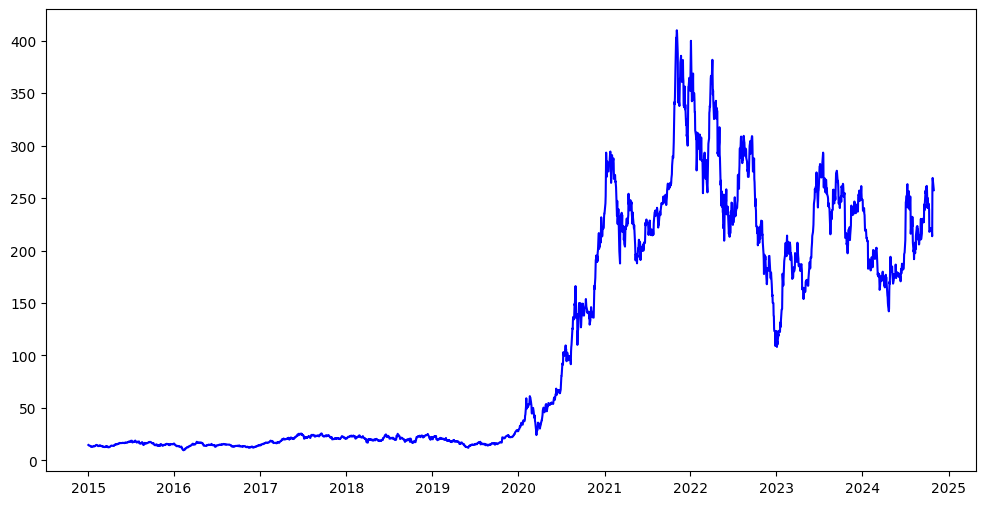

In [6]:
# Plot historical and future forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Historical Prices', color='blue')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='orange')
plt.title('Tesla Stock Price Forecast for Next 6-12 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'future_dates' is not defined

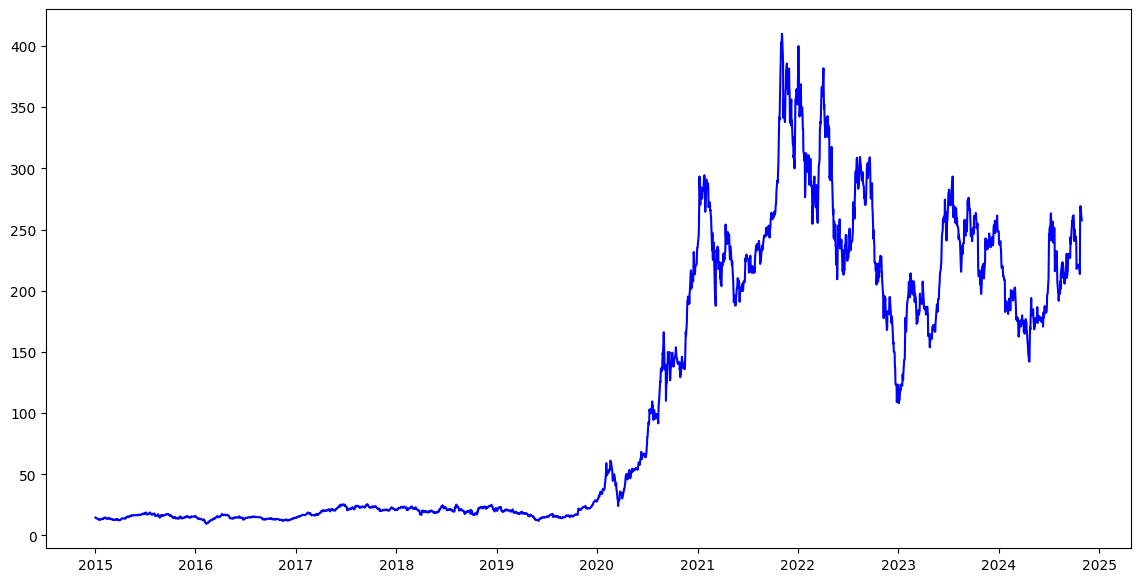

In [7]:
# Plot historical data and future forecasts with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data, label='Historical Prices', color='blue')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='orange')

# Plot confidence intervals
plt.fill_between(future_dates, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='gray', 
                 alpha=0.5, 
                 label='95% Confidence Interval')

plt.title('Tesla Stock Price Forecast for Next 6-12 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

###Analyze the Forecast
After visualizing the forecast, consider the following:

Trend Direction: Examine if the forecast indicates an upward or downward trend compared to historical data.
Confidence Intervals: The shaded area represents the uncertainty around the predictions. A wider interval indicates greater uncertainty.
Volatility: Assess how much the prices are expected to fluctuate over the forecast period.
External Factors: Consider how external events (economic changes, company news, etc.) might influence the forecast.

###Interpretation of the Forecast Results for Tesla's Stock Prices
Trend Analysis
Long-Term Trends:
Upward Trend: If the forecast shows a consistent increase in stock prices over the forecast period, it suggests a bullish sentiment toward Tesla's future performance. This could indicate growing investor confidence and positive market conditions.
Downward Trend: Conversely, if the forecast indicates a decline, it may reflect concerns regarding the company's performance, market competition, or broader economic factors influencing investor sentiment.
Stable Trend: A stable forecast with minimal fluctuations suggests that Tesla may have reached a plateau in its stock price, indicating a period of consolidation.
Patterns and Anomalies:
Seasonal Patterns: If the forecast reflects cyclical movements (e.g., price increases during certain months), this may indicate seasonal demand for Tesla’s products (e.g., higher sales in spring or summer).
Anomalies: Sudden spikes or drops in the forecast may warrant further investigation. These could be indicative of anticipated events (like product launches or earnings reports) or external economic conditions affecting the market.
Volatility and Risk
Uncertainty in Confidence Intervals:
The confidence intervals provide a range within which the future prices are expected to lie. A wider interval indicates greater uncertainty about the forecasted prices, suggesting potential volatility in the stock.
Narrow Confidence Intervals: A narrower range implies more certainty in the predictions, indicating that the market is expected to behave more predictably.
Periods of Increased Volatility:
Look for points in the forecast where the confidence intervals widen significantly. This suggests that the market may experience increased volatility during these periods, potentially due to anticipated events, earnings reports, or macroeconomic factors.
External Factors: Consider external influences that might lead to spikes in volatility, such as regulatory changes, economic downturns, or shifts in consumer behavior.
Market Opportunities and Risks
Market Opportunities:
Expected Price Increases: If the forecast indicates a strong upward trend, this could present opportunities for investment. Investors may want to consider entering positions in anticipation of price appreciation.
Strategic Buying: If certain periods show lower predicted prices but a subsequent recovery, this might indicate strategic buying opportunities for investors looking to capitalize on temporary dips.
Market Risks:
High Volatility: Periods identified with increased forecast uncertainty may pose risks for investors. High volatility can lead to significant price swings, making it challenging to predict short-term movements.
Potential Declines: If the forecast shows any expected declines, investors should be cautious. This could indicate a need to reevaluate holdings or consider hedging strategies to mitigate potential losses.
Broader Economic Indicators: Always consider how broader economic indicators (e.g., interest rates, inflation, and consumer confidence) might impact Tesla’s performance and the overall market sentiment.